In [1]:
#import libraries
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D , MaxPooling2D, Dropout  
from keras import models,layers
from keras.preprocessing import image
import pickle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
#Load Data
dir = 'C:\\Users\\hina\\Downloads\\archive(3)\\flowers\\flowers'    

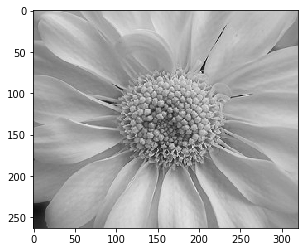

In [3]:
#visulaizing the image
categories = ["daisy","dandelion","rose","sunflower","tulip"]
for i in categories:
    path = os.path.join(dir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break


<function matplotlib.pyplot.show(*args, **kw)>

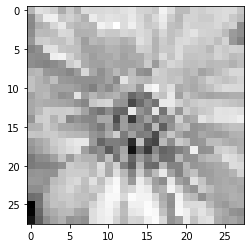

In [4]:
#resize all the images to a same size.
new_array = cv2.resize(img_array,(28,28))
plt.imshow(new_array,cmap="gray")
plt.show

In [5]:
#Labeling the images
data = []
def create_data():
    for category in categories:
        path = os.path.join(dir,i)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(28,28))
                data.append([new_array,class_num])
            except exception as e:
                pass


create_data()

In [6]:
print(len(data))

3845


In [7]:
new_array.shape

(28, 28)

In [8]:
#Shuffle the data 
import random
random.shuffle(data)

In [1]:
#for sample in data:
 #   print(sample[1])

In [10]:
x = []
y = []
for features,labels in data:
    x.append(features)
    y.append(labels)
    
x = np.array(x).reshape(-1,28,28,1)
x.shape


(3845, 28, 28, 1)

In [11]:
#convert into pickle
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [13]:
#normalization
x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
x = x/255.0

In [14]:
#split the data into train and test (into 60 and 40 ratio.)
train_images,test_images,train_labels,test_labels = train_test_split(x,y,test_size=0.4,random_state=0)
#train_images=np.array(train_images)
#test_images=np.array(test_images)
#train_labels=np.array(train_labels)
#test_labels=np.array(test_labels)
#print(test_labels.shape)
#print(train_labels.shape)
#print(train_images.shape)
#print(test_images.shape)


In [15]:
#Encode labels.
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#print(test_labels.shape)
#print(train_labels.shape)
#print(train_images.shape)
#print(test_images.shape)

In [16]:
train_labels = np.array(train_labels).astype("float32")
test_labels = np.array(test_labels).astype("float32")
train_labels
#train_images

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [17]:
from keras import regularizers
model = Sequential()
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.001),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#,kernel_regularizer=regularizers.l2(0.001)

model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),activation="relu", ))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),activation="relu"))

model.add(Dropout(0.5))

#model.add(Dense(10,kernel_regularizer=regularizers.l2(0.001),activation="relu"))

#model.add(Dropout(0.5))

model.add(Dense(5,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dense (Dense)                (None, 5, 5, 16)          1040      
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0

In [19]:
#Compilation Step
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
#Train the Model.
model.fit(train_images,train_labels,epochs=100,batch_size=128)

Epoch 1/100
19/19 [==============================] - 2s 86ms/step - loss: 1.7470 - accuracy: 0.1824
Epoch 2/100
19/19 [==============================] - 2s 80ms/step - loss: 1.7157 - accuracy: 0.1906
Epoch 3/100
19/19 [==============================] - 2s 93ms/step - loss: 1.6932 - accuracy: 0.1848
Epoch 4/100
19/19 [==============================] - 2s 92ms/step - loss: 1.6752 - accuracy: 0.2076
Epoch 5/100
19/19 [==============================] - 2s 82ms/step - loss: 1.6592 - accuracy: 0.1951
Epoch 6/100
19/19 [==============================] - 2s 81ms/step - loss: 1.6439 - accuracy: 0.2036
Epoch 7/100
19/19 [==============================] - 2s 81ms/step - loss: 1.6327 - accuracy: 0.1867
Epoch 8/100
19/19 [==============================] - 2s 80ms/step - loss: 1.6237 - accuracy: 0.2013
Epoch 9/100
19/19 [==============================] - 2s 81ms/step - loss: 1.6177 - accuracy: 0.2071
Epoch 10/100
19/19 [==============================] - 1s 76ms/step - loss: 1.6141 - accuracy: 0.2082

19/19 [==============================] - 2s 82ms/step - loss: 1.6095 - accuracy: 0.1993
Epoch 83/100
19/19 [==============================] - 2s 82ms/step - loss: 1.6094 - accuracy: 0.2037 1s - los
Epoch 84/100
19/19 [==============================] - 2s 81ms/step - loss: 1.6095 - accuracy: 0.2005
Epoch 85/100
19/19 [==============================] - 2s 88ms/step - loss: 1.6095 - accuracy: 0.2088 1s - l
Epoch 86/100
19/19 [==============================] - 2s 92ms/step - loss: 1.6095 - accuracy: 0.1889
Epoch 87/100
19/19 [==============================] - 2s 84ms/step - loss: 1.6095 - accuracy: 0.2014
Epoch 88/100
19/19 [==============================] - 2s 91ms/step - loss: 1.6092 - accuracy: 0.2069
Epoch 89/100
19/19 [==============================] - 2s 88ms/step - loss: 1.6090 - accuracy: 0.2111
Epoch 90/100
19/19 [==============================] - 2s 88ms/step - loss: 1.6091 - accuracy: 0.2063
Epoch 91/100
19/19 [==============================] - 2s 84ms/step - loss: 1.6095 - accu

In [21]:
#Evaluation Step
#Prediction should be > 85%
loss,acc = model.evaluate(test_images,test_labels)

49/49 [==============================] - 1s 7ms/step - loss: 1.6097 - accuracy: 0.1964


In [22]:
#Prediction
pred = model.predict(test_images)
pred[:5]


array([[0.19804461, 0.20241979, 0.20280334, 0.20007537, 0.1966569 ],
       [0.19804461, 0.20241979, 0.20280334, 0.20007537, 0.1966569 ],
       [0.19804461, 0.20241979, 0.20280334, 0.20007537, 0.1966569 ],
       [0.19804461, 0.20241979, 0.20280334, 0.20007537, 0.1966569 ],
       [0.19804461, 0.20241979, 0.20280334, 0.20007537, 0.1966569 ]],
      dtype=float32)

In [23]:
pred = np.round(pred)

In [24]:
pred[:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)